# Modelado de datos

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
edad, presion = np.loadtxt("blood_pressure.txt", unpack=True)

In [3]:
edad

array([39., 45., 47., 65., 46., 67., 42., 67., 56., 64., 56., 59., 34.,
       42., 48., 45., 17., 20., 19., 36., 50., 39., 21., 44., 53., 63.,
       29., 25., 69.])

In [4]:
presion

array([144., 138., 145., 162., 142., 170., 124., 158., 154., 162., 150.,
       140., 110., 128., 130., 135., 114., 116., 124., 136., 142., 120.,
       120., 160., 158., 144., 130., 125., 175.])

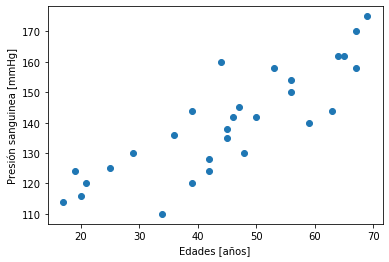

In [7]:
plt.scatter(edad, presion)
plt.xlabel("Edades [años]")
plt.ylabel("Presión sanguinea [mmHg]")
plt.show()

## Regresión Lineal

$$ p(e) = A \cdot e + B $$

In [8]:
from scipy.stats import linregress

In [9]:
linregress?

Signature: linregress(x, y=None)
Docstring:
Calculate a linear least-squares regression for two sets of measurements.

Parameters
----------
x, y : array_like
    Two sets of measurements.  Both arrays should have the same length.  If
    only `x` is given (and ``y=None``), then it must be a two-dimensional
    array where one dimension has length 2.  The two sets of measurements
    are then found by splitting the array along the length-2 dimension.  In
    the case where ``y=None`` and `x` is a 2x2 array, ``linregress(x)`` is
    equivalent to ``linregress(x[0], x[1])``.

Returns
-------
slope : float
    Slope of the regression line.
intercept : float
    Intercept of the regression line.
rvalue : float
    Correlation coefficient.
pvalue : float
    Two-sided p-value for a hypothesis test whose null hypothesis is
    that the slope is zero, using Wald Test with t-distribution of
    the test statistic.
stderr : float
    Standard error of the estimated gradient.

See also
--------


In [10]:
reg = linregress(edad, presion)

In [11]:
reg

LinregressResult(slope=0.9493225373316514, intercept=97.07708426577695, rvalue=0.8439069051978124, pvalue=8.876280872508932e-09, stderr=0.11614451633658138)

In [12]:
reg.slope

0.9493225373316514

In [13]:
reg.intercept

97.07708426577695

In [16]:
edad_reg = np.array([edad.min(), edad.max()])
presion_reg = reg.slope * edad_reg + reg.intercept

In [17]:
presion_reg

array([113.2155674 , 162.58033934])

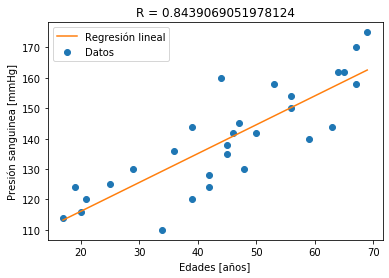

In [23]:
plt.scatter(edad, presion, label="Datos")
plt.plot(edad_reg, presion_reg, color="C1", label="Regresión lineal")
plt.xlabel("Edades [años]")
plt.ylabel("Presión sanguinea [mmHg]")
plt.title("R = " + str(reg.rvalue))
plt.legend()
plt.show()